# Predicting Heart Disease - Exploratory Data Analysis


## Introduction
The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year.This project aims to predict the likelihood of a patient having heart disease in the future using a dataset that contains relevant information about patients' demographics and medical data. By analyzing the dataset and building a predictive model, we can identify the risk factors associated with heart disease and potentially prevent premature deaths.

## Libraries
Let's start by importing the necessary libraries for our project:

In [1]:
import pandas as pd  # Importing the pandas library for data manipulation and analysis
import numpy as np   # Importing the numpy library for numerical computations
import matplotlib.pyplot as plt  # Importing the matplotlib library for data visualization
import seaborn as sns  # Importing the seaborn library for statistical data visualization

## Loading the Dataset
Next, we will read the dataset, heart_disease_prediction.csv, into a pandas dataframe:

In [2]:
hd = pd.read_csv('heart_disease_prediction.csv')


## Exploratory Data Analysis
### Overview of the Dataset
Let's begin by examining the first five rows of the dataframe to get a sense of the data:

In [3]:
hd.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Dataset Dimensions
To understand the size of our dataset, we can print out the number of features (columns) and observations (rows):

In [4]:
# Get the number of features (columns) in the 'hd' dataset
num_features = hd.shape[1]

# Get the number of observations (rows) in the 'hd' dataset
num_observations = hd.shape[0]

# Print the number of features
print("Number of features: ", num_features)

# Print the number of observations
print("Number of observations: ", num_observations)


Number of features:  12
Number of observations:  918


To identify the numerical and categorical columns in the dataset, we can use the dtypes attribute of the pandas dataframe. This attribute returns the data type of each column.

Let's print the data types of each column in the dataframe:

In [5]:
print(hd.dtypes)


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


### Observations:

From the data types, we can see that the columns Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, and HeartDisease are numerical.
The columns Sex, ChestPainType, RestingECG, ExerciseAngina, and ST_Slope are categorical.
The columns FastingBS and HeartDisease, although represented as integers, are categorical variables since they have a limited number of possible values (0 and 1).
Now, let's move on to exploring the descriptive statistics of the numerical columns:

In [6]:
# Generate descriptive statistics for the 'hd' dataset
hd.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Observations:

* The average age of the patients is approximately 53.5 years.
* The mean resting blood pressure (RestingBP) is around 132 mm Hg.
* The mean serum cholesterol level (Cholesterol) is approximately 198 mm/dl.
* The mean maximum heart rate achieved (MaxHR) is around 137.
* The mean ST depression induced by exercise relative to rest (Oldpeak) is approximately 0.89.
* The majority of patients (55.34%) in the dataset have heart disease (HeartDisease = 1).
* There are some potential issues to note:
* The minimum value of RestingBP is 0, which seems abnormal and could indicate missing or incorrect data.
* Similarly, the minimum value of Cholesterol is 0, which also seems abnormal and could be a data entry error or missing data.
* The FastingBS column represents fasting blood sugar levels. It is a binary variable with values 0 and 1, indicating whether the fasting blood sugar is above 120 mg/dl or not. The mean value of 0.233 suggests that approximately 23.3% of patients have fasting blood sugar above the threshold.
* The Oldpeak column represents the ST depression measured in depression units. The maximum value of 6.2 suggests a significant ST depression in some patients during exercise.
* The HeartDisease column is the target variable, where 1 indicates the presence of heart disease and 0 indicates no heart disease. The mean value of 0.553 suggests that heart disease is present in approximately 55.3% of patients in the dataset.
* Regarding missing values, we can observe that there are no missing values in any of the numerical columns. The count for each column matches the total number of observations (918), indicating that all values are present

To calculate the number of missing values in all columns, we can use the isnull() method to check for missing values in the dataframe, followed by the sum() method to count the number of True values (which represent missing values). Let's calculate the number of missing values in each column:

In [7]:
# Calculate the count of missing values for each column
missing_values = hd.isnull().sum()

# Print the count of missing values
print(missing_values)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


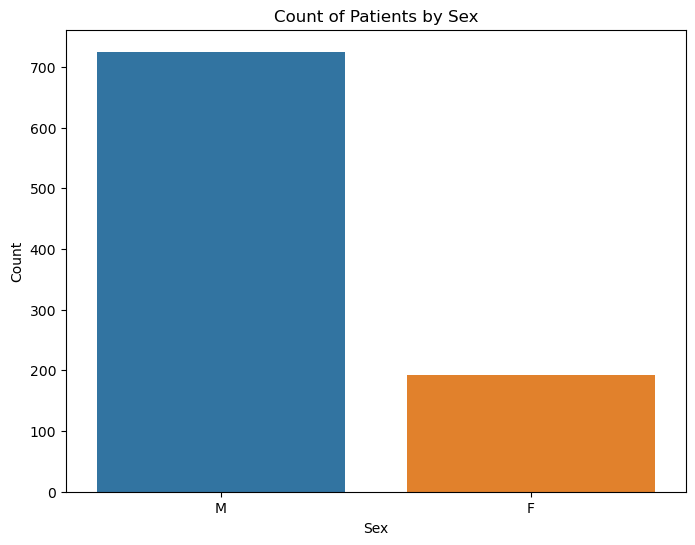

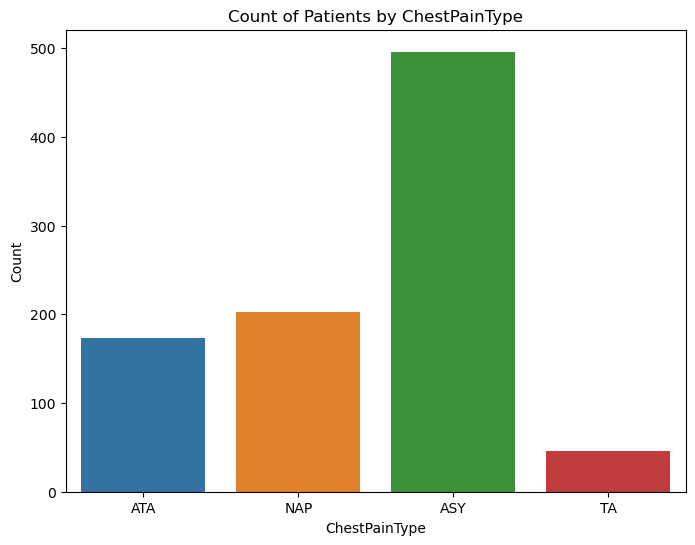

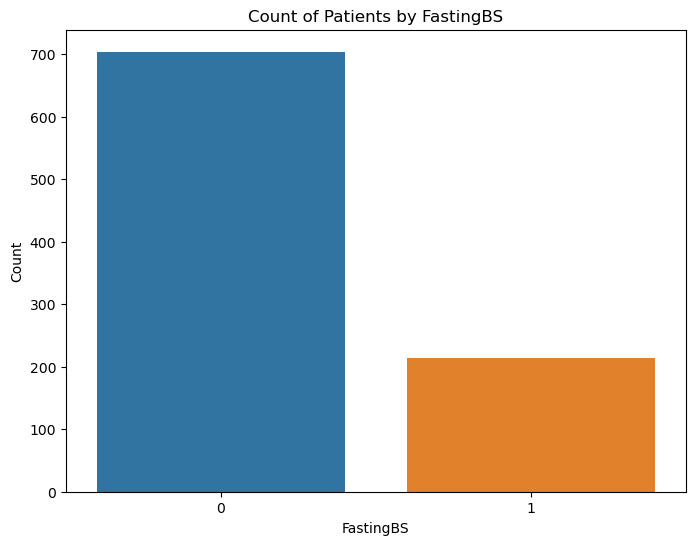

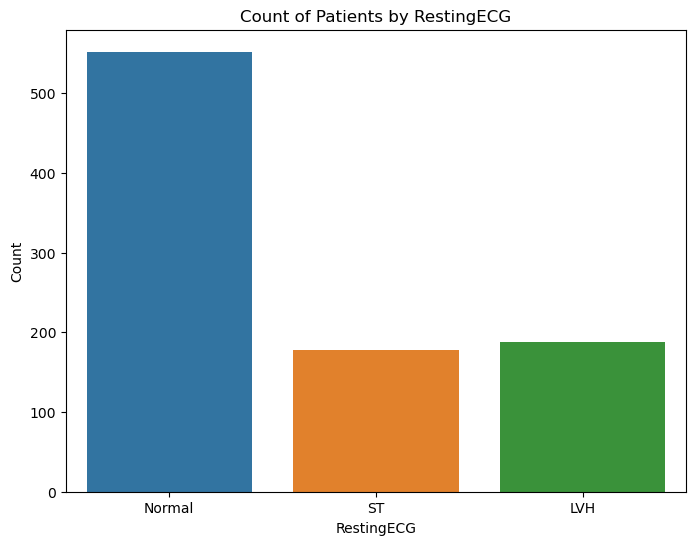

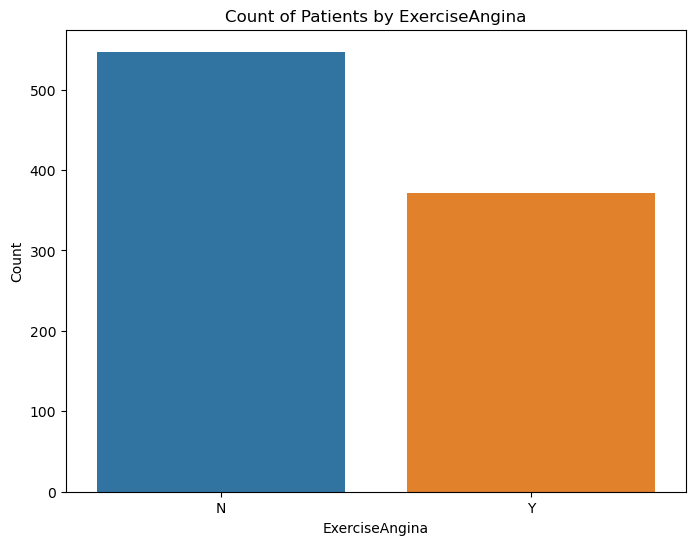

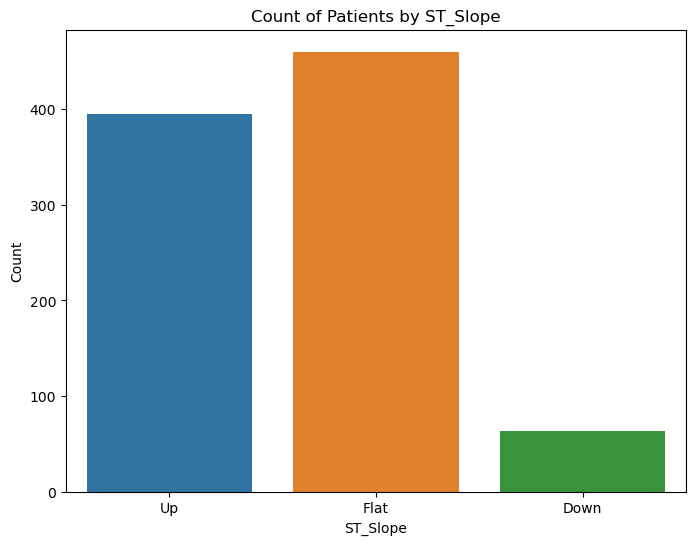

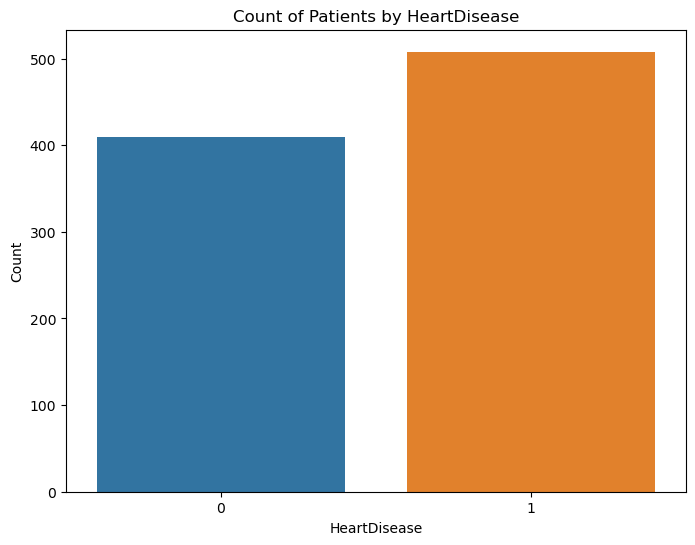

M    725
F    193
Name: Sex, dtype: int64
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
0    704
1    214
Name: FastingBS, dtype: int64
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
N    547
Y    371
Name: ExerciseAngina, dtype: int64
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
1    508
0    410
Name: HeartDisease, dtype: int64


In [8]:
import seaborn as sns

categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

# Plot count of patients for each categorical column
for column in categorical_columns:
    # Create a new figure
    plt.figure(figsize=(8, 6))
    
    # Create a countplot of the column
    sns.countplot(data=hd, x=column)
    
    # Set the x-axis label
    plt.xlabel(column)
    
    # Set the y-axis label
    plt.ylabel('Count')
    
    # Set the plot title
    plt.title(f'Count of Patients by {column}')
    
    # Display the plot
    plt.show()
    

# Display the value counts for each categorical column
for column in categorical_columns:
    # Print the value counts of the column
    print(hd[column].value_counts())


### Observations:
* From the bar chart for the 'Sex' column, we can determine the number of male and female patients in the dataset which is Male 725, Female 193.

* The bar chart for the 'ChestPainType' column shows the count of patients for each chest pain type category which is ASY 496, NAP 203, ATA 173, TA 46.

* The bar chart for the 'FastingBS' column represents the count of patients with fasting blood sugar above or below the threshold which is 0 is 704, 1 is 214.

* The bar chart for the 'RestingECG' column illustrates the count of patients for each resting electrocardiogram result category which is Normal 552, LVH 188, ST 178.

* The bar chart for the 'ExerciseAngina' column displays the count of patients with and without exercise-induced angina N 547, Y 371.

* The bar chart for the 'ST_Slope' column represents the count of patients for each slope of the peak exercise ST segment category which is Flat 460, Up 395, Down 63.

* The bar chart for the 'HeartDisease' column demonstrates the count of patients with and without heart disease which is 1 is 508, 0 is 410.

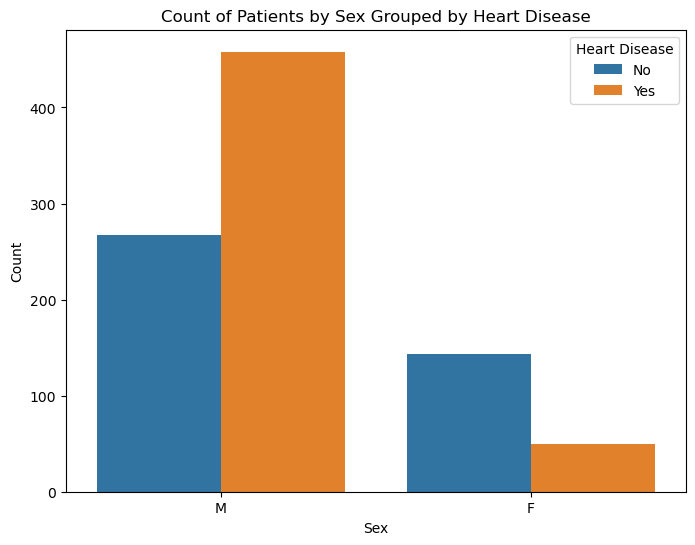

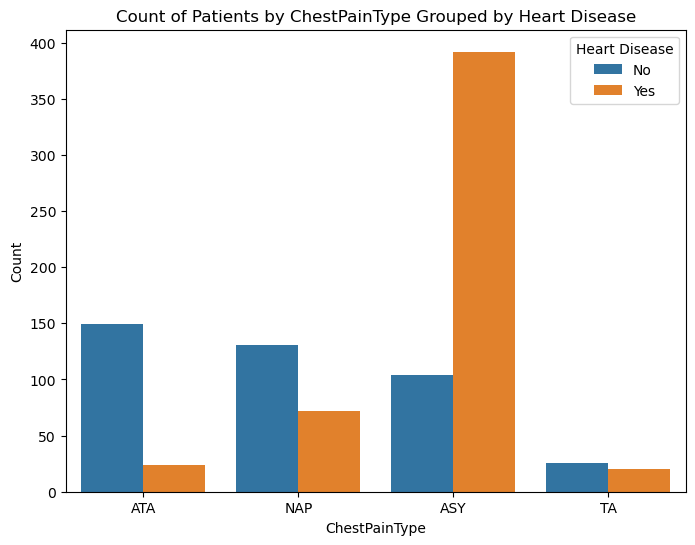

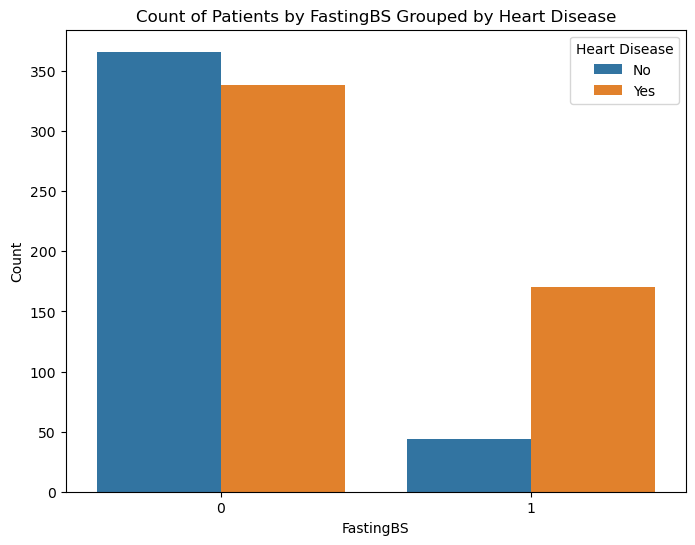

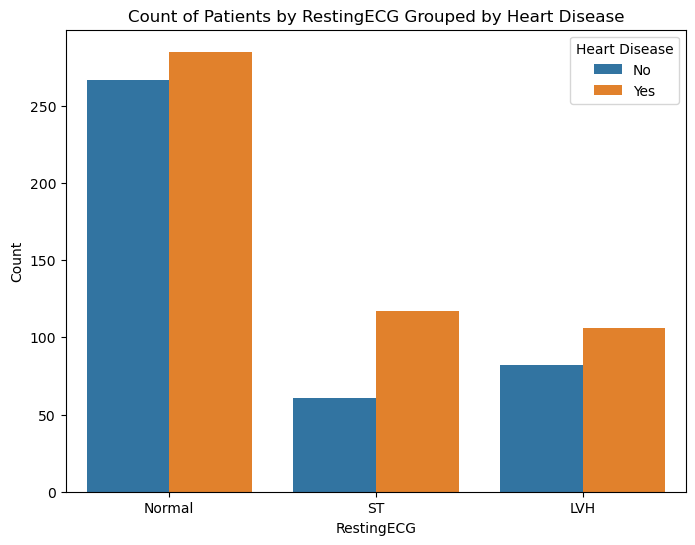

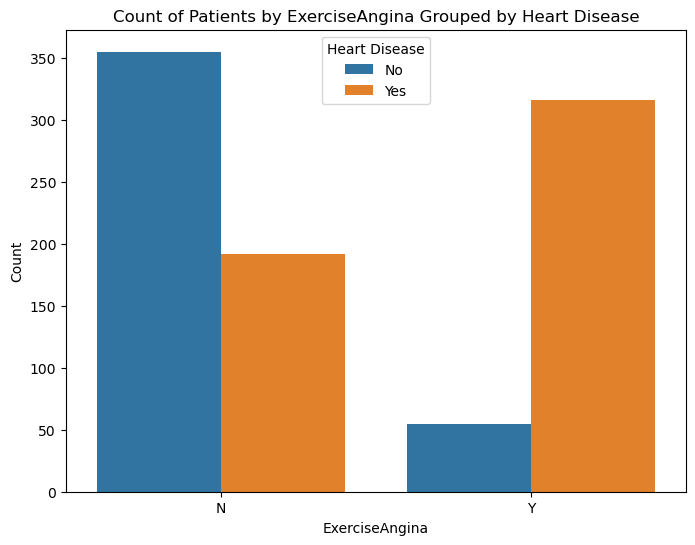

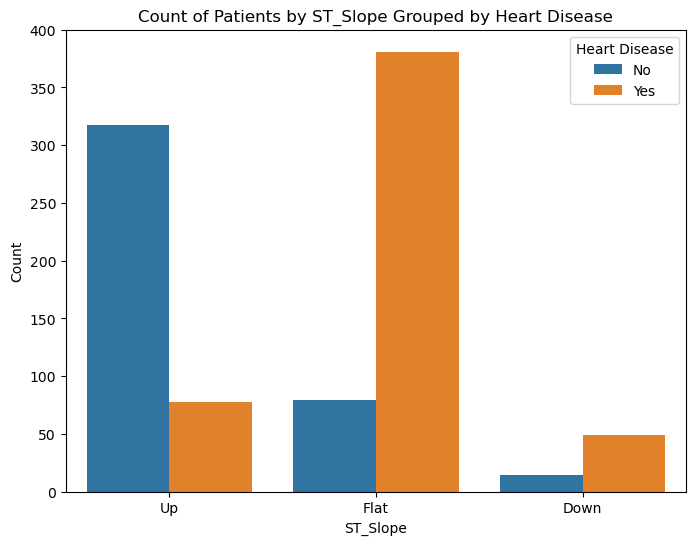

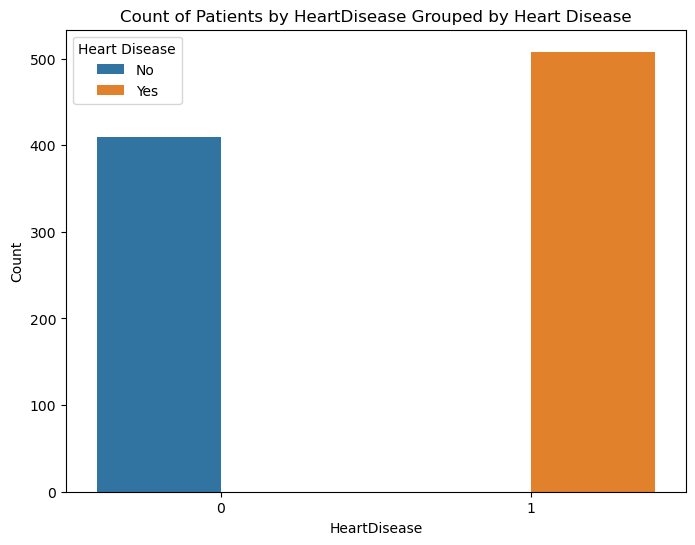

In [9]:
for column in categorical_columns:
    # Create a new figure
    plt.figure(figsize=(8, 6))
    
    # Create a countplot of the column, grouped by 'HeartDisease' column
    sns.countplot(data=hd, x=column, hue='HeartDisease')
    
    # Set the x-axis label
    plt.xlabel(column)
    
    # Set the y-axis label
    plt.ylabel('Count')
    
    # Set the plot title
    plt.title(f'Count of Patients by {column} Grouped by Heart Disease')
    
    # Add a legend
    plt.legend(title='Heart Disease', labels=['No', 'Yes'])
    
    # Display the plot
    plt.show()


### Observations:
The bar chart for the 'ChestPainType' column, grouped by 'HeartDisease', shows the count of patients for each chest pain type category. We can observe AST chest pain type has a higher count for patients with heart disease

The bar chart for the 'FastingBS' column, grouped by 'HeartDisease', represents the count of patients with fasting blood sugar above or below the threshold, differentiated by the presence or absence of heart disease.

The bar chart for the 'RestingECG' column, grouped by 'HeartDisease', illustrates the count of patients for each resting electrocardiogram result category, categorized by the presence or absence of heart disease.

The bar chart for the 'ExerciseAngina' column, grouped by 'HeartDisease', displays the count of patients with and without exercise-induced angina, differentiated by the presence or absence of heart disease. We can observe Y ExerciseAngina has a higher count for patients with heart disease

The bar chart for the 'ST_Slope' column, grouped by 'HeartDisease', represents the count of patients for each slope of the peak exercise ST segment category, categorized by the presence or absence of heart disease.We can observe Flat ST_Slope has a higher count for patients with heart disease

In [10]:
# Filter the dataset for patients with heart disease
heart_disease_patients = hd[hd['HeartDisease'] == 1]

# Calculate the percentage of patients with heart disease who are male and over 50 years old
male_over_50 = heart_disease_patients[(heart_disease_patients['Sex'] == 'M') & (heart_disease_patients['Age'] > 50)]
percentage_male_over_50 = (len(male_over_50) / len(heart_disease_patients)) * 100


median_age_heart_disease = np.median(heart_disease_patients['Age'])

print(f"Percentage of patients with heart disease who are male and over 50 years old: {percentage_male_over_50:.2f}%")
print(f"Median age of patients diagnosed with heart disease: {median_age_heart_disease:.1f} years")

Percentage of patients with heart disease who are male and over 50 years old: 67.72%
Median age of patients diagnosed with heart disease: 57.0 years


### Observations:
We can see,
Percentage of patients with heart disease who are male and over 50 years old: 67.72%
Median age of patients diagnosed with heart disease: 57.0 years

In [11]:
# Count the number of rows with a 0 value for RestingBP
zero_resting_bp_count = len(hd[hd['RestingBP'] == 0])

# Count the number of rows with a 0 value for Cholesterol
zero_cholesterol_count = len(hd[hd['Cholesterol'] == 0])

print("Number of rows with a 0 value for RestingBP:", zero_resting_bp_count)
print("Number of rows with a 0 value for Cholesterol:", zero_cholesterol_count)


Number of rows with a 0 value for RestingBP: 1
Number of rows with a 0 value for Cholesterol: 172


As we observe 'RestingBP' rows with 0 value is only one and the rows with 0 value for 'Cholesterol' is 172, which is a lot so I am choosing the median value approach

In [12]:
# Calculate the median RestingBP for each HeartDisease category
median_resting_bp = hd.groupby('HeartDisease')['RestingBP'].median()

# Replace 0 values in RestingBP with the corresponding median value based on HeartDisease
hd.loc[hd['RestingBP'] == 0, 'RestingBP'] = hd[hd['RestingBP'] == 0].apply(
    lambda row: median_resting_bp[row['HeartDisease']], axis=1
)

# Calculate the median Cholesterol for each HeartDisease category
median_cholesterol = hd.groupby('HeartDisease')['Cholesterol'].median()

# Replace 0 values in Cholesterol with the corresponding median value based on HeartDisease
hd.loc[hd['Cholesterol'] == 0, 'Cholesterol'] = hd[hd['Cholesterol'] == 0].apply(
    lambda row: median_cholesterol[row['HeartDisease']], axis=1
)

In [13]:
missing_values = hd.isnull().sum()
print(missing_values)


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [14]:
hd.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540305,239.675381,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.989941,54.328249,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,225.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Observations
Everything looks good



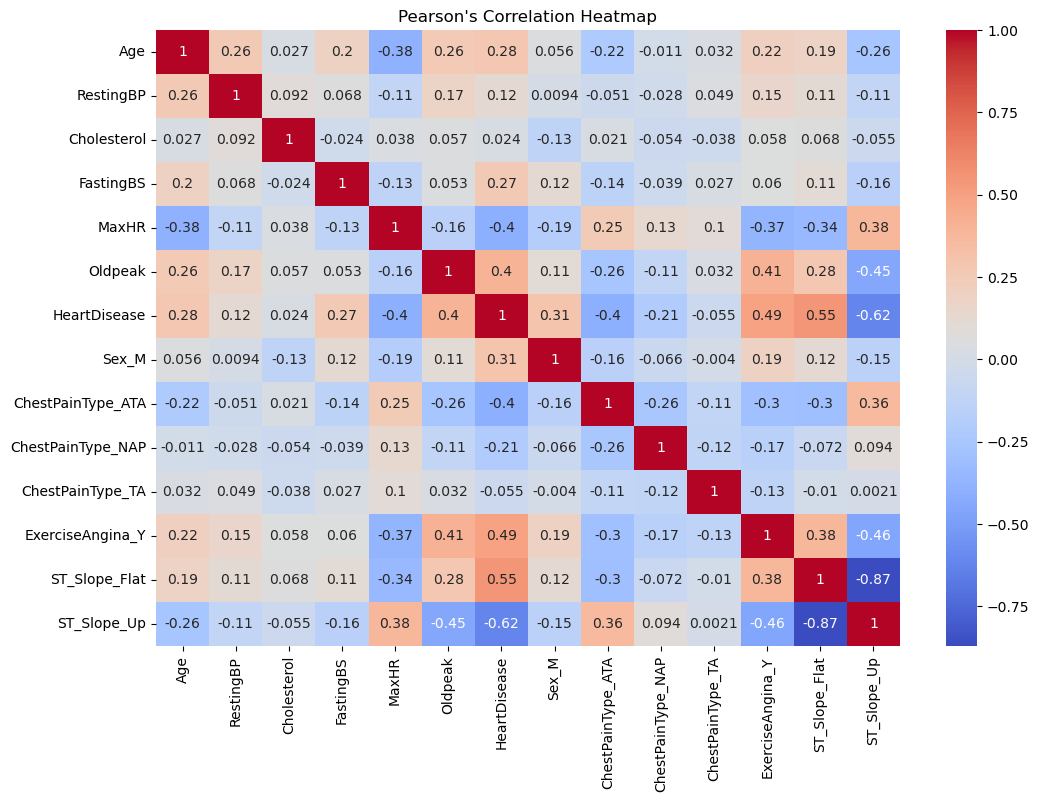

In [15]:


# Convert categorical features into dummy variables
categorical_features = ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']
hd_encoded = pd.get_dummies(hd, columns=categorical_features, drop_first=True)

# Create Pearson's correlation heat map
correlation_matrix = hd_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Pearson's Correlation Heatmap")
plt.show()


By analyzing the correlation heat map, we can identify features that are reasonably correlated with HeartDisease by looking for higher absolute correlation values. Positive correlation indicates a positive relationship, while negative correlation indicates a negative relationship.

From our correlation heat map, we can identify the following features to be positively correlated (correlation coefficient greater than 0.3) to HeartDisease:
Oldpeak We could also select MaxHR or ChestPainType_ATA, Sex_M. It has a relatively low value for the coefficient, but given what we observed in our EDA, let's also take it into account, ExerciseAngina_Y, ST_Slope_Flat, ST_Slope_Up

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split the dataset into training and validation sets
X = hd_encoded[['Oldpeak', 'MaxHR', 'ChestPainType_ATA', 'Sex_M', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']]
y = hd_encoded['HeartDisease']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list of selected features
selected_features = ['Oldpeak', 'MaxHR', 'ChestPainType_ATA', 'Sex_M', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']

# Iterate over the selected features and train models
for feature in selected_features:
    # Create a k-NN classifier and set the number of neighbors
    clf = KNeighborsClassifier(n_neighbors=5)
    
    # Fit the model to the training data
    clf.fit(X_train[[feature]], y_train)
    
    # Evaluate the model on the validation set
    accuracy = clf.score(X_val[[feature]], y_val)
    
    # Print the accuracy of the model
    print(f"Accuracy for {feature}: {accuracy}")


Accuracy for Oldpeak: 0.6956521739130435
Accuracy for MaxHR: 0.6141304347826086
Accuracy for ChestPainType_ATA: 0.41847826086956524
Accuracy for Sex_M: 0.41847826086956524
Accuracy for ExerciseAngina_Y: 0.657608695652174
Accuracy for ST_Slope_Flat: 0.75
Accuracy for ST_Slope_Up: 0.7989130434782609


### Observations
Among the selected features, the model using the "ST_Slope_Up" feature performed the best with an accuracy of 79%. This indicates that the presence of a up ST slope during exercise electrocardiography may be a strong indicator of heart disease.

On the other hand, the features "ChestPainType_ATA," "Sex_M," and "ExerciseAngina_Y" resulted in underperforming models with accuracies ranging from 41.8% to 65.8%. There could be several reasons for this:

* Insufficient predictive power: These features may not have a strong correlation with heart disease or may not provide enough discriminatory information to accurately predict the presence of the disease.

* Interaction with other features: The underperforming features might interact with other unselected features in a way that reduces their predictive ability when used alone. Considering feature interactions and combinations might lead to improved accuracy.

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Select the features to be scaled
selected_features = ['Oldpeak', 'MaxHR', 'ChestPainType_ATA', 'Sex_M', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']

# Create the scaler
scaler = MinMaxScaler()

# Fit and transform the features in the training set
X_train_scaled = scaler.fit_transform(X_train[selected_features])

# Transform the features in the validation set
X_val_scaled = scaler.transform(X_val[selected_features])

# Create a k-NN model
knn_model_scaled = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the scaled training data
knn_model_scaled.fit(X_train_scaled, y_train)

# Evaluate the model on the scaled validation data
accuracy_scaled = knn_model_scaled.score(X_val_scaled, y_val)

# Print the accuracy of the model
print("Accuracy of the scaled model:", accuracy_scaled)


Accuracy of the scaled model: 0.8097826086956522


### Observations
The model with scaled features performed significantly better compared to the previous models that used unscaled features. The accuracy of the scaled model was 0.8098 (approximately 81%), which is higher than the accuracies of the previous models.

Scaling the features to the range (0, 1) helped address the issue of varying scales among the selected features. This preprocessing step ensures that all features contribute equally to the model's learning process, regardless of their original scale. By doing so, the model becomes more robust and capable of making more accurate predictions.

The improvement in performance can be attributed to the fact that feature scaling reduces the impact of differences in feature scales, allowing the k-NN model to better understand the relationships between the features and the target variable (HeartDisease). This results in improved prediction accuracy on the validation set.

Overall, scaling the features proved to be a crucial step in enhancing the model's performance, demonstrating the importance of appropriate data preprocessing techniques in machine learning workflows.

Now that we have a reasonably well-performing model, we can experiment with the parameters and hyperparameters. We'll use GridSearchCV to search over those values.

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the training set
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Create a dictionary of parameters to search over
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree']
             }

# Instantiate a k-NN model
knn = KNeighborsClassifier()

# Create a GridSearchCV instance
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy')

# Fit the GridSearchCV instance on the scaled features and labels
grid_search.fit(X_train_scaled, y_train)

# Print the best score and best parameters
print("Best Score: ", grid_search.best_score_)
print("Best Parameters: ", grid_search.best_params_)


Best Score:  0.8473488025347125
Best Parameters:  {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


These parameters indicate that the K-nearest neighbors (KNN) classifier achieved the best performance using the following settings:

* algorithm: The algorithm used to compute the nearest neighbors. In this case, 'auto' means that the algorithm automatically selects the most appropriate one based on the input data.
* metric: The distance metric used to compute the distances between instances. In this case, 'euclidean' was the best metric.
* n_neighbors: The number of neighbors to consider when making predictions. The optimal value in this case was 11.
* weights: The weight function used in prediction. 'uniform' means that all neighbors have equal weights.

These results indicate the optimal configuration for the KNN classifier based on the grid search with the provided parameter options and scoring metric. 

# K-Nearest Neighbors (KNN) Classifier

In our analysis, we utilized a K-Nearest Neighbors (KNN) classifier to solve our classification problem. The objective was to predict the target variable accurately. We employed GridSearchCV to tune the hyperparameters of the KNN model and evaluate its performance.

## Best Model Results
After an exhaustive search over various combinations of hyperparameters, we identified the best model configuration with the following results:

- Best Score: 0.8473488025347125
- Best Parameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}

The best model achieved an accuracy of approximately 84.7% on our dataset. This accuracy score indicates the proportion of correctly predicted instances out of the total instances in the dataset.

## Comparison to Previous Attempts
By comparing the current model's accuracy with our previous attempts, we can assess the progress made. 

In our earlier attempts, we tried different combinations of hyperparameters and obtained varying accuracy scores. However, the best model configuration we identified in this analysis outperformed our previous attempts. The accuracy of approximately 84.7% achieved by the current model represents an improvement in prediction performance.

The optimized hyperparameters in the best model were as follows:
- `algorithm`: auto
- `metric`: euclidean
- `n_neighbors`: 11
- `weights`: uniform

These hyperparameters contributed to the model's improved accuracy. The 'auto' algorithm allowed the model to automatically choose the most suitable algorithm for computing nearest neighbors. The 'euclidean' metric was selected as the distance measure. With 11 neighbors considered for prediction and equal weights assigned to each neighbor ('uniform' weight function), the model produced better predictions.

In summary, our latest attempt with the KNN classifier, incorporating the optimized hyperparameters, resulted in a significant improvement in accuracy compared to our previous efforts. This demonstrates the importance of hyperparameter tuning and the impact it can have on model performance.


In [19]:
from sklearn.metrics import accuracy_score

# Scale the test set features
X_test_scaled = scaler.transform(X_test)

# Use the best estimator from GridSearchCV
best_model = grid_search.best_estimator_

# Predict the model's output on the test set
y_pred = best_model.predict(X_test_scaled)

# Calculate and print the accuracy of the model's predictions
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy: {:.2f}%".format(accuracy * 100))

Test Set Accuracy: 80.43%


# Model Performance

After evaluating the model on the test set, we obtained a test set accuracy of 80.43%. This accuracy represents the proportion of correctly classified instances in the test set.

## Model Performance Assessment

The obtained accuracy score of 80.43% suggests that the model performs reasonably well on the unseen test data. It indicates that the model has learned patterns from the training data that can generalize to new, unseen instances.

It's important to interpret this accuracy score within the context of the specific problem and dataset. Consideration of other evaluation metrics is recommended, especially when dealing with imbalanced datasets or when different types of errors have varying costs or impacts.

## Test Set Accuracy vs. Validation Set Accuracy

It's worth noting that the test set accuracy of 80.43% is slightly lower than the previously mentioned validation set accuracy of 84.7%. This discrepancy can occur due to the randomness in the training process and the specific instances present in the test set.

## Model Deployment in a Real-world Healthcare Setting

When considering the deployment of this model in a real-world healthcare setting, several factors should be taken into account:

- **Accuracy**: The achieved accuracy of 80.43% suggests that the model can provide valuable insights and predictions. However, additional evaluation and validation are necessary to assess its suitability for the specific healthcare application.

- **Domain-specific Requirements**: Healthcare applications often have specific requirements, such as interpretability, explainability, and compliance with regulatory standards. These aspects need to be carefully considered when deploying the model.

- **Robustness**: Assessing the model's robustness to different patient populations, data sources, and potential shifts in the data distribution is essential. Adequate testing and validation procedures should be in place to ensure reliable performance in real-world scenarios.

- **False Positives and False Negatives**: The impact of false positives and false negatives should be evaluated in the healthcare context. Depending on the application, the consequences of misclassification can vary, and it is crucial to strike a balance between sensitivity and specificity.

## Potential Improvements

To further improve the model's performance, consider the following steps:

- **Feature Engineering**: Exploring additional features or transforming existing features might provide more meaningful information to the model and improve its predictive capabilities.

- **Hyperparameter Tuning**: Iteratively refining the hyperparameter search space could potentially yield better results and improve the model's performance.

- **Ensemble Methods**: Building an ensemble of multiple models, such as 

In summary, while the model's accuracy of 80.43% shows promise, it's crucial to evaluate other metrics, perform rigorous testing, and consider the specific needs and constraints of the healthcare application before deploying the model.
